In [1]:
# -*- coding: utf-8
# Repórter Brasil (http://ruralometro.reporterbrasil.org.br/)
# Reinaldo Chaves (@paidatocandeira)
# Programa para acessar a declaração de bens de deputados federais em 2014 e separar apenas os bens rurais
#

In [ ]:
import pandas as pd
import numpy as np
import unidecode
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

Função para retirar acentuação

In [2]:
def f(str):
    return (unidecode.unidecode(str))

Formato float

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
bens_2014 = pd.read_csv("dados/bens_2014.csv",sep=',',encoding = 'utf-8', converters={'sequencial': lambda x: str(x)})

In [5]:
bens_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82888 entries, 0 to 82887
Data columns (total 5 columns):
uf            82888 non-null object
sequencial    82888 non-null object
descricao     82888 non-null object
detalhe       82888 non-null object
valor         82888 non-null float64
dtypes: float64(1), object(4)
memory usage: 3.2+ MB


In [7]:
candidatos_2014 = pd.read_csv("dados/candidatos_2014.csv",sep=',',encoding = 'utf-8', converters={'cpf': lambda x: str(x), 'sequencial': lambda x: str(x)})

Revogação da liminar que atribuiu efeito suspensivo ao Recurso Extraordinário 847135, proferida na Ação Cautelar 3778, conforme mensagem do STF - o Tribunal procedeu à nova retotalização do resultado das Eleições de 2014. Foram computados como nulos os 16379 votos recebidos por Geraldo Hilario Torres. Com isso, Franklin passa à condição de 1º suplente e Adelmo Leão passa à condição de eleito.

In [67]:
eleitos = candidatos_2014[(candidatos_2014['situacao'] == 'ELEITO POR QP') | 
                          (candidatos_2014['situacao'] == 'ELEITO POR MÉDIA') | 
                          (candidatos_2014['situacao'] == 'ELEITO') |
                          (candidatos_2014['nome_completo'] == 'ADELMO CARNEIRO LEAO')]
eleitos_d = eleitos[(eleitos['cargo'] == 'DEPUTADO FEDERAL') & 
                    (eleitos['nome_completo'] != 'FRANKLIN ROBERTO DE LIMA SOUZA')]

outra forma

In [8]:
eleitos = candidatos_2014[(candidatos_2014['situacao'] == 'ELEITO POR QP') | 
                          (candidatos_2014['situacao'] == 'ELEITO POR MÉDIA') | 
                          (candidatos_2014['situacao'] == 'ELEITO')]
eleitos_d = eleitos[(eleitos['cargo'] == 'DEPUTADO FEDERAL')]

In [9]:
eleitos_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 144 to 26209
Data columns (total 8 columns):
uf                 513 non-null object
cargo              513 non-null object
nome_completo      513 non-null object
sequencial         513 non-null object
cpf                513 non-null object
nome_urna          513 non-null object
partido_eleicao    513 non-null object
situacao           513 non-null object
dtypes: object(8)
memory usage: 36.1+ KB


In [10]:
bens_gerais_candidatos_2014 =  pd.merge(eleitos_d, bens_2014, left_on='sequencial', right_on='sequencial')

bens_gerais_candidatos_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6400 entries, 0 to 6399
Data columns (total 12 columns):
uf_x               6400 non-null object
cargo              6400 non-null object
nome_completo      6400 non-null object
sequencial         6400 non-null object
cpf                6400 non-null object
nome_urna          6400 non-null object
partido_eleicao    6400 non-null object
situacao           6400 non-null object
uf_y               6400 non-null object
descricao          6400 non-null object
detalhe            6400 non-null object
valor              6400 non-null float64
dtypes: float64(1), object(11)
memory usage: 650.0+ KB


In [70]:
bens_gerais_candidatos_2014.to_excel('resultados/bens_gerais_deputados_2014.xlsx',sheet_name='Sheet1')

In [11]:
bens_gerais_candidatos_2014["detalhe"] = bens_gerais_candidatos_2014["detalhe"].apply(f)

Formas de selecionar os bens rurais

In [12]:
str_choice = "LOTE RURAL|FAZENDA|IMOVEL RURAL|GLEBA|AREA RURAL|AREA NO LOTEAMENTO|TERRENO AGRICOLA|ESTABELECIMENTOS RURAIS|ESTABELECIMENTO RURAL|ATIVIDADE AGRICOLA|ATIVIDADES AGRICOLAS" 
areas = bens_gerais_candidatos_2014[bens_gerais_candidatos_2014['detalhe'].\
                               str.contains(str_choice, na=False)]

In [13]:
areas.to_excel('resultados/bens_rurais_deputados_2014.xlsx',sheet_name='Sheet1')

In [14]:
areas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 52 to 6391
Data columns (total 12 columns):
uf_x               283 non-null object
cargo              283 non-null object
nome_completo      283 non-null object
sequencial         283 non-null object
cpf                283 non-null object
nome_urna          283 non-null object
partido_eleicao    283 non-null object
situacao           283 non-null object
uf_y               283 non-null object
descricao          283 non-null object
detalhe            283 non-null object
valor              283 non-null float64
dtypes: float64(1), object(11)
memory usage: 28.7+ KB


In [15]:
search_list = ["LOTE RURAL", 
               "FAZENDA", 
               "IMOVEL RURAL", 
               "GLEBA", 
               "AREA RURAL", 
               "AREA NO LOTEAMENTO", 
               "TERRENO AGRICOLA", 
               "ESTABELECIMENTOS RURAIS",
               "ESTABELECIMENTO RURAL", 
               "ATIVIDADE AGRICOLA", 
               "ATIVIDADES AGRICOLAS"]

In [16]:
mask = bens_gerais_candidatos_2014['detalhe'].str.contains('|'.join(search_list))

In [17]:
areas2 = bens_gerais_candidatos_2014[mask]

In [18]:
areas2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 52 to 6391
Data columns (total 12 columns):
uf_x               283 non-null object
cargo              283 non-null object
nome_completo      283 non-null object
sequencial         283 non-null object
cpf                283 non-null object
nome_urna          283 non-null object
partido_eleicao    283 non-null object
situacao           283 non-null object
uf_y               283 non-null object
descricao          283 non-null object
detalhe            283 non-null object
valor              283 non-null float64
dtypes: float64(1), object(11)
memory usage: 28.7+ KB


In [86]:
areas.reset_index().head()

,index,uf_x,cargo,nome_completo,sequencial,cpf,nome_urna,partido_eleicao,situacao,uf_y,descricao,detalhe,valor
0,52,PA,DEPUTADO FEDERAL,JOSUÉ BENGTSON,140000000945,09673504768,JOSUÉ BENGTSON,PTB,ELEITO POR QP,PA,Terreno,TERRENO AGRICOLA 300 HA STA LUZIA DO PARA,"6,260.85"
1,108,PA,DEPUTADO FEDERAL,JOSE GERALDO TORRES DA SILVA,140000000435,17188326215,ZÉ GERALDO,PT,ELEITO POR QP,PA,Terreno,LOTE RURAL COM 5 BENFEITORIAS NO MUNICIPIO DE ...,"70,000.00"
2,114,PA,DEPUTADO FEDERAL,JOSE ROBERTO OLIVEIRA FARO,140000000436,40070565287,BETO FARO,PT,ELEITO POR QP,PA,Terreno,TERRENO COM ATIVIDADES AGRICOLAS E CASA EM ALV...,"200,000.00"
3,115,PA,DEPUTADO FEDERAL,JOSE ROBERTO OLIVEIRA FARO,140000000436,40070565287,BETO FARO,PT,ELEITO POR QP,PA,Terreno,"TERRENO AGRICOLA SITUADO EM BUJARU, MARGEM DIR...","20,000.00"
4,119,PA,DEPUTADO FEDERAL,JOSE ROBERTO OLIVEIRA FARO,140000000436,40070565287,BETO FARO,PT,ELEITO POR QP,PA,Terreno,TERRENO AGRICOLA SITUADO NO MUNICIPIO DO ACARA...,"50,000.00"


Tabela dinâmica

In [87]:
pd.pivot_table(areas,index=["partido_eleicao","nome_urna"], values=["valor"], aggfunc=np.sum)

valor
partido_eleicao nome_urna                      
DEM             EFRAIM FILHO          42,000.00
                FRAGA              1,490,000.00
                MISAEL VARELLA       150,000.00
                PAULO AZI             25,000.00
PC do B         ORLANDO SILVA        470,000.00
PDT             ABEL GALINHA       1,220,000.00
                AFONSO MOTTA       7,241,007.86
                DAGOBERTO NOGUEIRA 1,820,959.12
                GIOVANI  CHERINI     935,000.00
                MARCELO MATOS         40,000.00
                MARIO HERINGER       200,150.00
                WEVERTON ROCHA        15,000.00
PMDB            ANIBAL                31,365.92
                BALEIA ROSSI         305,000.00
                CARLOS BEZERRA       555,081.09
                CARLOS GAGUIM        655,080.00
                DULCE MIRANDA        215,000.00
                EDINHO ARAUJO        287,833.55
                EDIO LOPES           230,000.00
                LUCIO MOSQUINI     1,256,040.00
                LUCIO VIEIRA LIMA    644,995.48
                MARCELO CASTRO     1,171,645.63
                MARINHA RAUPP         10,000.00
                MAURO LOPES           20,000.00
                OSMAR SERRAGLIO        6,375.74
                RONALDO BENEDET      105,000.00
                SARAIVA FELIPE       250,000.00
                VALDIR COLATTO           951.37
PP              ARTHUR LIRA          419,000.00
                DILCEU SPERAFICO   4,384,168.50
...                                         ...
PSDB            IMBASSAHY             23,203.23
                IZALCI             1,381,770.00
                JOÃO CASTELO         163,397.86
                JOÃO GUALBERTO       525,000.00
                LUIZ CARLOS HAULY    165,184.91
                MARCIO MONTEIRO      724,810.82
                MIGUEL HADDAD        125,396.85
                PEDRO VILELA         578,068.42
                RODRIGO DE CASTRO    123,614.85
                SHÉRIDAN             120,000.00
                VALDIR ROSSONI       112,333.49
PSL             MACEDO               300,000.00
PSOL            CHICO ALENCAR         61,600.00
PT              ADELMO LEAO          140,000.00
                AFONSO FLORENCE       92,000.00
                ANGELIM               60,000.00
                ASSIS DO COUTO       116,000.00
                BETO FARO            390,000.00
                CAETANO                7,500.00
                ODAIR CUNHA           55,000.00
                RUBENS OTONI         224,500.00
                ZÉ CARLOS            100,000.00
                ZÉ GERALDO            70,000.00
PTB             ALEX CANZIANI        321,309.38
                BENITO GAMA           74,995.72
                JOSUÉ BENGTSON         6,260.85
                JOVAIR ARANTES     1,404,717.82
SD              ARTHUR MAIA           13,805.57
                EXPEDITO NETTO     1,194,000.00
                GENECIAS NORONHA     391,171.00

[113 rows x 1 columns]

Deputados com bens rurais mais caros

In [88]:
areas.groupby("nome_urna").valor.sum().reset_index().sort_values("valor", ascending=False)

,nome_urna,valor
90,PAULO MAGALHÃES,"9,561,443.00"
4,AFONSO MOTTA,"7,241,007.86"
26,DILCEU SPERAFICO,"4,384,168.50"
49,IRAJÁ ABREU,"3,922,582.63"
84,NELSON MEURER,"3,120,582.00"
25,DAGOBERTO NOGUEIRA,"1,820,959.12"
29,DOMINGOS SÁVIO,"1,800,000.00"
68,LÁZARO BOTELHO,"1,760,000.00"
75,MARCOS MONTES,"1,752,938.83"
45,HEULER CRUVINEL,"1,500,000.00"


Detalhe de um deputado

In [89]:
nome = areas[(areas['nome_urna'] == 'PAULO MAGALHÃES')]
nome.reset_index()

,index,uf_x,cargo,nome_completo,sequencial,cpf,nome_urna,partido_eleicao,situacao,uf_y,descricao,detalhe,valor
0,4329,BA,DEPUTADO FEDERAL,PAULO SERGIO PARANHOS DE MAGALHÃES,50000000157,06015530553,PAULO MAGALHÃES,PSD,ELEITO POR QP,BA,Terra nua,FAZENDA NOVA FLORENTINA EM ITAETE BAHIA,"330,000.00"
1,4330,BA,DEPUTADO FEDERAL,PAULO SERGIO PARANHOS DE MAGALHÃES,50000000157,06015530553,PAULO MAGALHÃES,PSD,ELEITO POR QP,BA,Terra nua,FAZENDA PEDRO E MARIA EM ITACARE BAHIA,"123,443.00"
2,4331,BA,DEPUTADO FEDERAL,PAULO SERGIO PARANHOS DE MAGALHÃES,50000000157,06015530553,PAULO MAGALHÃES,PSD,ELEITO POR QP,BA,Terra nua,FAZENDA BOM JESUS EM ITACARE BAHIA,"76,800.00"
3,4334,BA,DEPUTADO FEDERAL,PAULO SERGIO PARANHOS DE MAGALHÃES,50000000157,06015530553,PAULO MAGALHÃES,PSD,ELEITO POR QP,BA,Terra nua,FAZENDA IRACEMA,"3,300,000.00"
4,4335,BA,DEPUTADO FEDERAL,PAULO SERGIO PARANHOS DE MAGALHÃES,50000000157,06015530553,PAULO MAGALHÃES,PSD,ELEITO POR QP,BA,Terra nua,FAZENDA MARGARIDA,"1,500,000.00"
5,4336,BA,DEPUTADO FEDERAL,PAULO SERGIO PARANHOS DE MAGALHÃES,50000000157,06015530553,PAULO MAGALHÃES,PSD,ELEITO POR QP,BA,Terra nua,FAZENDA MANDACARU EM ITORORO BAHIA,"250,000.00"
6,4337,BA,DEPUTADO FEDERAL,PAULO SERGIO PARANHOS DE MAGALHÃES,50000000157,06015530553,PAULO MAGALHÃES,PSD,ELEITO POR QP,BA,Terra nua,FAZENDA CONFIDENCIA EM ITORORO BAHIA,"391,000.00"
7,4346,BA,DEPUTADO FEDERAL,PAULO SERGIO PARANHOS DE MAGALHÃES,50000000157,06015530553,PAULO MAGALHÃES,PSD,ELEITO POR QP,BA,Terra nua,FAZENDA BOM SUCESSOGO EM URUCUCA BAHIA,"96,000.00"
8,4347,BA,DEPUTADO FEDERAL,PAULO SERGIO PARANHOS DE MAGALHÃES,50000000157,06015530553,PAULO MAGALHÃES,PSD,ELEITO POR QP,BA,Terra nua,FAZENDA DOIS IRMAOS EM URUCUCA BAHIA,"179,200.00"
9,4349,BA,DEPUTADO FEDERAL,PAULO SERGIO PARANHOS DE MAGALHÃES,50000000157,06015530553,PAULO MAGALHÃES,PSD,ELEITO POR QP,BA,Terra nua,FAZENDA PINDORAMA EM ITAJU DA COLONIA BAHIA,"1,100,000.00"


Gráfico por partidos

In [90]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

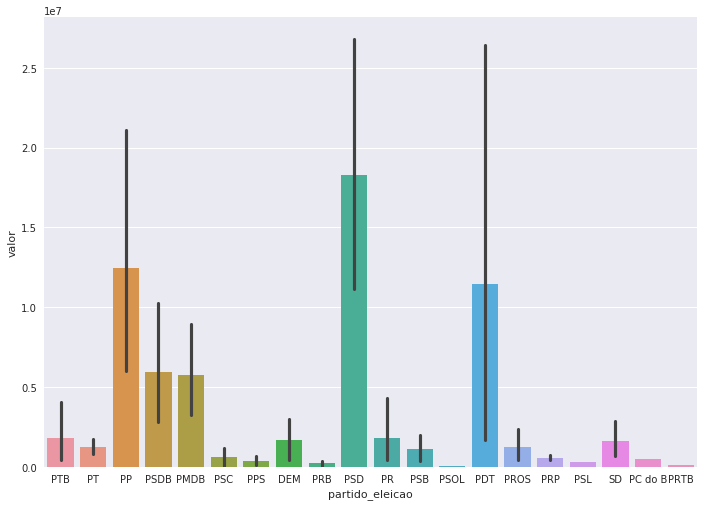

In [91]:
sns.barplot(x='partido_eleicao',y='valor',data=areas,estimator=np.sum)